In [1]:
'''This notebook was solved in google collab. Please ensure quadrator.py and quadrator.png are preent in the same folder to prevent errors.
Below piece of code may be required to plot graphs if running in google collab'''
# from google.colab import output
# output.enable_custom_widget_manager()

'This notebook was solved in google collab. Please ensure quadrator.py and quadrator.png are preent in the same folder to prevent errors.\nBelow piece of code may be required to plot graphs if running in google collab'

# Exercise 4
In this exercise, we will control a 2D drone depicted in the figure below <br>
<img src='quadrotor.png' width="300">

Consider the following simplified linear model of the drone
$$\begin{align}
    x_{n+1} = A
    x_n + B u_n
\end{align}$$

where the components of the state $x_n$ correspond to the horizontal position and velocity of the quadrotor, its vertical position and velocity and its orientation and angular velocity. The control vector
$u_n$ contains the forces produced by the rotors (our control inputs).
The module ```quadrotor.py``` defines the matrices $A$ and $B$ and code to generate a simulation of the drone.

In [2]:
## what we need to do computation and display the drone
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

import quadrotor

In [3]:
# the matrices A and B are already defined in the quadrotor module
print(f'A =\n {quadrotor.A}')
print(f'B =\n {quadrotor.B}')

A =
 [[ 1.      0.01    0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.     -0.0981  0.    ]
 [ 0.      0.      1.      0.01    0.      0.    ]
 [ 0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.01  ]
 [ 0.      0.      0.      0.      0.      1.    ]]
B =
 [[ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.02   0.02 ]
 [ 0.     0.   ]
 [ 0.015 -0.015]]


In [4]:
# we can display the behavior of the drone based on a given control input

# we can also start at x0 = 0 and generate a random control of 0 for 300 time steps
x0 = np.zeros((6,1))
u = np.random.rand(2,300)

quadrotor.animate_robot(x0, u, goal=[3,3])

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAIZxtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzE5MSA0NjEzYWMzIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyNCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE5
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EVdliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwACHHgr8h1jA36boAAANaAG
nDrYXyDtwsG4ADkM2nT0QaSj1Mgzh8GOQsx6w9cThDpUwwEKhHlge0GugevniUOGp0WszRxBFR66
gzXXmL2NwrGK2g/zo7VlYAmvTA6JRKrguBRBQd6O1xLHbbVpQW0+mTVga92O7zBo2XeTeMkY9E33
7krU8FEeeRw0/MLPNBvKuo8t3pOnDcm9pL3L3OR19QN0E+nVUsu+S/oB6HbmKEJZktBAPOf8MSQh
DlYR55GSu9BJVPQTcypm5vzMQehLT3j+JvsAWcmxpoUcJfjpqSalskpMn+/FL2W7nMY+SsdGrpJ4
F4E4BY+3Gq2gWiKI59cS+0mAldKHBHHoNSuZCYA36pZet4852fNPfhSIWYlv+2HI5PP9sKgAwHVh
+Yb17TB0ukltFsXXiFuAAABrgZTmEZTzBB1YU2Ob9oySKCbVUgaWLIWPYxbC/oXaZDw9QsZ6D/SF
hJTGSRNa3fRC+hb3h9nSxqMlN97NyiDoqXBX0pEAO/+zG4k5DbXsVT5VnxHPyiV3kmW1BSofaOzu
ETJx/Woi5QN/WJSweae3zLFvR8ze07CC0eA2n/eUzjNwpXB1771oiRqc73QTO2DdFzDki5FoJaK3
iYnN3Ry1HXVb42X0J3rUbyo8ox7t+Q+obxWcCySxfvJp3LHX/1sAQzLNeqoisdK+W7AR2Pl9YgrV
acM/iS/EQdLrUi9hd9q0o5RKZ6vvAOmExiuoaoY1kRgO4Z3a27em8pQ2HTgdj5R+8hBnHAyszq7G
RHJZb4j61gXsEEh2GaCK22C9IL/pJ+0Bdl0xRg+NtYSnOCN5TcdzfSjcnuKqhbk1nkb64aYbmMGu
28NG6xFytZ+FdBuYmom7fMInxt23/z7JCShHPpTwg/ikr++9fHKeaNyhWsogndJhpMWUmMZGNtxl
8VoZoC0MwGke6Yq64atEZJ2XTCgz5k970IpFIvm8kw6wjCi4msbcJW6iKKUi6MbudI+4ZWHGr4V8
4ZPueupxvfwMjgfvi96SOuRv0phJ+/bmm5rF9MZt7Sfkhj3nfxN6iUanCvjYNa8T02R6MZKjcwZ3
M9RmpmlZPr571JAMJQW8sHxxoXSaUhNnXQeANFVVQU4DQI18MOvqMkyWYQnIxeaL9EY0/s0EpHHB
IfGBzHiRXI2hvQZV131HiHp9kPy6Ld+PULtrsIoz+64JsT+njXRqh1pdVPIctfb2DDfwJTBrKMRj
LxtRS+RhxK9kRAPlpWnC2pn6Te2iaCFz5gOJpLzoDXRrvm43CWsJBqKKNXmNyx0zbaAv4UusLzgO
B5LO1QRf2M/lCC69cISlJogJfohbXhAp4tYvMoBlhwCuaZmEZjj9+0rwgt6e36GGsA01IM0dcpp5
1/nOa6mnRPpwnzXEvROK6pBrBZrlALV1gAXugRKjYiHGbrq4mvme7Uf3md1UAfPLSSWM770kV4lW
eGU+8YnOrxDpn6hDtmEwVdJRRze6IP91GCpRAv2NpsY/P/GEB270VHW6lJrmfGqXk/st6R3Zaw2a
0mSG/RgxVOIqonpg/HzrSdLXL+uJDtRCfEAAWjvhfQATMCis+f1DCdQS11UWegBwbOKzViWE36Ff
8LmBr4k0utTS5CkKYednFb1d+JEKq+hXORpAX90Uv+iWcUtorvqxAllCeLZj8tUz96cwxegTBwqW
tHjxir/U0rP/xZJv+90S8M0Aib2Q4McQNBmma0rVUEW8ju49iQYucKaaVMbBQnknQXY6XPr6zX3Q
lJ37QFJZhO56FZe3t2+z3BYIQHWaChAVzA3HHNhPiGxclsAhYSzcNW7XkrDz0f6uhS39OS0Lb9aB
jHfGH6Y0mA+FA8eCd1j1aefpymZt0LuwqU2nbbbt/Qk18tMIfm7cy5Eez8Wp//Vhi+Xth8k+qRXd
6Ek9jWhZeT+RK+G2D0P3d/5ab4/b27tOQ+RjlQN2qkAhC6RbyNbxO1fPSmvDa/1WTM3AAfB2bLD8
5V9nE48fXYB7D8xdgiuuih4FH8n4BMbH7TJ3d6k/cJOenRgmbjaDba8mC7EM7WD0oTACjvwu2vOS
mtIIGheSc9ZuWdMKcQSl9Pq0gy08DDFHUsEoFSYEGl+x3T+n0F2gf/7lLNf2woUPscxyyVwbKY0P
VltJXY59lQlqKv2J2h28F0cK14XnqJYyp7S4wHFe27g/G+gaOADr1CQfYzskxygg5T0cfNH0vnN+
ddHOhLlk6MtkTbHPPr3IhjDCrM3LVfAFZGUJYIMQufxEaQH0PVS2D11gbQMa/+92IFqRnJV9+wWP
aVc7CXf1hAOpTVqrnW9DfcVsSJw6RZPz/WaM3+psABD8QV1gqRNfiljWIGVBAWZba2wnrfUInlY+
dVyccn76M0HK1OhJTyUswRkad1DDIFyeWiFhyerjPr1oyx9o90nhcAfSykbclm13H/iSwlhqmg+H
L09i3dstP3sIv7o6vIZkurpI8mtM39J9ujMaG0yl8/tSknNaJ82nCsQ7UgUI2OBJUX6OYBdJq/fw
gUMnHcofcPlkur0ejyNRUG2jTREdJb3D3IfiHVoofD218b83Ony9D7fGyz8BIubpLGvYRFUi0RJR
sQIqgH5RGkS62X1/jUsHTCJnW0cM911o+r7HCYmOSepI0Cg4tL+caLC1NZeH9vxmf+A3QFQ/PL01
xU05Pn0OYljucAl/cZgloExCEw3odQnPagG76ErhdHUpDU22AD6hfKfkgiPQc7nps1zm/2nXDsa4
4tuz8tVNBTMIqbXo4qSTubw/9kxi71h5AvMCxacSdHIeLphAYt7pWcStjidgCwAGGL93tAHE5yoq
uujrkPbmJZAbSGnRl16sO

We want to generate a control input will move the drone towards the point $(3,3)$ starting from $(0,0)$. In order to
do so, we define a cost that penalizes the distance to the goal at each time step while minimizing velocities and the amount of trust needed,
i.e. we want to solve the following optimal control problem
$$\begin{align}
&\min_{x_0, u_0, x_1, u_1, \cdots} \frac{1}{2}\sum_{n=0}^{N} (x_n - x_{desired})^T Q (x_n - x_{desired}) + u_n^T R u_n\\
\textrm{subject to}\ \ & x_{n+1} = A x_{n} + B u_n\\
& x_0 = [0,0,0,0,0,0]^T
\end{align}$$
where $x_{desired} = [3,0,3,0,0,0]^T$

1. Write down the KKT conditions for the problem
2. Write code to solve the problem for N=500 time steps (you will need to find diagonal matrices $Q>0$ and $R>0$ to create a nice movement) by solving the KKT system of linear equations. Do NOT inverse the KKT matrix, instead use the [NumPy solve function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) which is numerically more stable and efficient.
4. Show plots of all the states of the robot as a function of time
5. Show plots of the optimal control as a function of time

# **Answer 1**

If ignoring constant terms, i.e. terms that do not depend on $x_n$ we can expand thsi expression to be

$\sum_{n=0}^{N} \left( \frac{1}{2}x_n^T Q x_n + \frac{1}{2}u_n^T R u_n - \bar{x}_n^T Q x_n \right)$


We can write this minimization function in the form of 
$$\begin{align}
\min_{y} \frac{1}{2} y^T G y + g^T y
\end{align}$$

by writing the entire sum of terms as a single matrix operation:

Taking all our state variables and control variables stacked on top of each other like:
$$ y =\left[\begin{array}{l}
              x_0 \\
              u_0 \\
              x_1 \\
              u_1 \\
              .  \\
              .\\
              x_n\\
              u_n\\
                \end{array}\right]$$
The multiplication with penalty terms can be written as a matrix G which has Q and R on its diagonals:
$$ G =\left[\begin{array}{llllll}
              Q & 0 & 0 & .. & 0 & 0\\
              0 & R & 0 & .. & 0 & 0\\
              0 & 0 & Q & .. & 0 & 0\\
              0 & 0 & 0 & .. & Q & 0\\
              0 & 0 & 0 & .. & 0 & R\\
                \end{array}\right]$$

This matrix has (N+1) Q matrices and (N+1) R matrics in its diagonals so its shape is ((N+1)(xdim + udim) $\times$ (N+1)(xdim + udim))


This is because Q and R have shape (xdim, xdim) and (udim, udim) as they are diagonal matrices which are meant to multiply penalty terms to each term in x and u


For the matrix g, we can create a matrix that will multiply $-x_{desired}Q$ into each $x_i$ term like so:
$$ g =\left[\begin{array}{l}
              -x_{desired}Q \\
              0 \\
              -x_{desired}Q \\
              0 \\
              .  \\
              .\\
              -x_{desired}Q\\
              0\\
                \end{array}\right]$$


Similar to this we can also stack our constraints in a matrix equation in the form of Cy - d = 0
Here C is each constraint equation stacked row wise along with our initial condition for $x_0 = [0,0,0,0,0,0]^T$:


$$ C =\left[\begin{array}{lllllllll}
              I & 0 & 0 & 0 & 0 & 0 & .. & 0 & 0\\
              A & B & -I & 0 & 0 & 0 & .. & 0 & 0\\
              0 & 0 & A & B & -I & .. & 0 & 0 & 0\\
              . & . & . & . & . &.. & 0 & 0 & 0\\
              0 & 0 & 0 & 0 & 0 & .. & B & -I & 0\\
                \end{array}\right]$$

The d vector only serves to complete our $x_0$ equation:
$$ d =\left[\begin{array}{l}
              x_0 \\
              0 \\
              0 \\
              .  \\
              .\\
              0\\
                \end{array}\right]$$

Putting both equations of function and constraint together using Lagrange we get
$$\begin{aligned}
    L(y, \lambda) = \frac{1}{2}y^TGy + g^Ty + \lambda^T(Cy - d)
\end{aligned}$$
Using KKT we get

$\underline{\nabla_y L(y, \lambda) = Gy + g + C^T\lambda = 0 }\ \& \\\\ \underline{Cy - d = 0}$

Our final solution is 
          $$
              \left[\begin{array}{l}
                      y \\
                      \lambda
                  \end{array}\right]=\left[\begin{array}{ll}
                      G & C^{\top} \\
                      C & 0
                  \end{array}\right]^{-1}\left[\begin{array}{l}
                      -g \\
                      d
                  \end{array}\right]
          $$



# **Answer 2**

In [5]:
xdim = 6 #Since we have 6 state variables- horizontal position and velocity, its vertical position and velocity, orientation and angular velocity
udim = 2 #Given 2 control variables
N = 500  #For 500 time steps

Q = np.eye(xdim)   #We initiate our penalty terms for state of the quadraptor, each diagonal element represents a penalty in the corresponding state variable of x.
Q[0,0] = 100
Q[1,1] = 100
Q[2,2] = 100
Q[3,3] = 100
Q[4,4] = 100
Q[5,5] = 100

R = np.eye(udim) #Similarly penalty term for each varibale in u ae setup through matirx R
R[0,0] = 1
R[1,1] = 1

def optimize(Q, R, N, xdim, udim):
  nvars = (N+1)*(xdim + udim) #This is our total variables, since we have N+1 time steps of x and u variables each (from 0 to n), total variables is (xdims + udims)*(N+1)

  # We initialize the G matrix and populate it with Q and R on its diagonals for each x and u from 0 to N+1 using a afor loop.
  G = np.zeros((nvars, nvars))
  for i in range(N+1):
      G[i*(xdim+udim):i*(xdim+udim)+xdim,i*(xdim+udim):i*(xdim+udim)+xdim] = Q
      G[i*(xdim+udim)+xdim:i*(xdim+udim)+xdim+udim, i*(xdim+udim)+xdim:i*(xdim+udim)+xdim+udim] = R

  #Our g vector is for the additional penalty which depends on the desired x1, x3 position.
  g = np.zeros((nvars))
  for i in range(N+1):
      g[i*(xdim+udim):i*(xdim+udim)+xdim] = -np.array([[3,0,3,0,0,0]]) @ Q

  #Values for A and B matrix are taken from quadrator.py
  A = quadrotor.A
  B = quadrotor.B

  #C matrix is setup by first setting up the first row ith just an identity matrix in the start and then iterating through all the constraint equations
  C = np.zeros([xdim * (N+1), nvars])
  C[0:6, 0:6] = np.eye(xdim)
  for i in range(N):
      C[(i+1)*xdim:(i+2)*xdim, i*(xdim+udim)+xdim:i*(xdim+udim)+xdim+udim] = B
      C[(i+1)*xdim:(i+2)*xdim, (i+1)*(xdim+udim):(i+1)*(xdim+udim)+xdim] = -np.eye(xdim)
      C[(i+1)*xdim:(i+2)*xdim, i*(xdim+udim):(i)*(xdim+udim)+xdim] = A

  #setup our d vector of mostly zeros but first xdim terms will be x_0 = [0,0,0,0,0,0]
  d = np.zeros([xdim * (N+1)])
  d[0] = 0
  d[1] = 0
  d[2] = 0
  d[3] = 0
  d[4] = 0
  d[5] = 0
  d[6] = 0

  #Setting up our KKT matrix [ G CT ]
  #                          [ C  0 ]
  nconstraints = C.shape[0]
  KKT = np.zeros((nvars+nconstraints, nvars+nconstraints))

  KKT[0:nvars, 0:nvars] = G
  KKT[nvars:, 0:nvars] = C
  KKT[0:nvars, nvars:] = C.T

  f = np.zeros((nvars+nconstraints,1))

  f[0:nvars,0] = -g
  f[nvars:,0] = d

  #Solve the KKT equations
  y_lambda = np.linalg.solve(KKT, f)

  #Separate the result to get states x and controls u

  #To pick out each state variable and control variable we have to extract them based on their order in the resulting matrix
  x_a = y_lambda[0:nvars:8]
  x_b = y_lambda[1:nvars:8]
  x_c = y_lambda[2:nvars:8]
  x_d = y_lambda[3:nvars:8]
  x_e = y_lambda[4:nvars:8]
  x_f = y_lambda[5:nvars:8]
  states = [x_a, x_b, x_c, x_d, x_e, x_f]


  control1 = y_lambda[6:nvars:8]
  control2 = y_lambda[7:nvars:8]
  controls = [control1, control2]

  return states, controls

states, controls = optimize(Q, R, N, xdim, udim)

In [6]:
#With the help of the found control variables we can simulalte the movement of the quadrator
control1, control2 = controls
u = []
for i in range(N):
    u.append([control1[i], control2[i]])
u = np.asarray(u).reshape(500,2)

x0 = np.zeros((6,1))
quadrotor.animate_robot(x0, u.T, goal=[3,3])

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAMAFtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzE5MSA0NjEzYWMzIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyNCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE5
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EQNliIQAP//+92ifAptaQ3qA5JXFJdtPgf+rZ3B8j+kDAAADAAADAAAVt6RlhkJ0L/JiAAAFfACy
BoAJ0/deNlxATljGKOZAuIjme27NfsYhAbFOlewDRF4IfKNDMH4Fv/q9RH8BCnmQCtkOmDFO5FsH
C/gh+ENzqQrfd3lpmJFLa+MNDKZs3fAjY20pX6A+EXDineinS/1R3baEFsSXbbf6hIVmeXqGcaP8
VTwxCrdyHWvaBrDj1N+wdZ3pbWsr21bD30HrNIAH3L9fLqY22RMX0uNu261iN63x3534+dC3oilR
IMhd1P2Q6MqAEXXQxeR3yCjnJEN+hp+qeLUJsvuK43U8CXKIfy/TrX2TfrQbEbHQzcoirKEIlUTN
dH3si1OP3VjXa345J8c/x/JrUJ1COOAkTYQh/g0Md8oYnS+vnPhlhAagjUfdVaxUYXy4l2q/R/5l
afLwxI/GwZkNjFvV5RRFMf8TYOmXXDerAQT0iOnQ/jkCYwBLPh+WpK5XwGi6L7OXu6DxniZwe4cs
w745kn8a3SEAvvQjthb/yaSMdKtge/4QBnwXr3A3Xdg6+hmXh9nMHqqVnfJlmB4yQPqqPylZBr/X
kKF083a9iqfKs+I5u1w1yJMtqCntDPK2PcgyeZwZHySWFO/9kehkkD5vysmOLwZQ7t7qwPM9x8vf
5Gdp66p19IiiawVCnhh0J4+noZQ0iBq0BfU39IjY/gntoB7Ux1LOhHAmMDRyXWwfRB3Iy4fcCjSX
FXOEeZnR8lafjD9vH8k9D8fLPo6iF3CVxdFZQ9nxhKz/oVj9IbWVyfRqOHYBpVocg/dK1b//py5E
hV7J3Khe9QAVmRr2jAwJ4NgRUWhtuvVdMkkPJehIcAV9uZCH+wC5UYvsmVyDviHLjUd50jyPwr2U
LISQ3ajW3fp1Ya3O/A2MNwlbP10yp1FQKxpDr+hWuVIe77nf9A/YIHWXEqLqGfB3l3o0uwoQhhvz
g6muUFi2lk0Hzj7vxkm0qcCuqQUaypUpMpHmM6IYvnw8t0tfT+vQkB3adRHM4ALVkXv8CMFWoz6Q
HtRLy+c1GJoJ5/McT8dbB5xG23s3PPzLdppbBnA3PZgn5d+dLbQscsiZOnzywYTcp8s5pEln2asa
fkKVzTtDQAAA3HNxPS017IhmrMx51w8FCfH6yoJCvwQ+b7nCaw875gdqTtlNWC185TqFscLlmidO
GAkH1fSKHqO290QevH6IjCt1/ljDv28o+wt1Wuwx5pMasQbSZRLDSAcXbpuprLkaN1J4qFM/EOj7
/k3PBQaFexywFSliyVeSd8QVKRN+oHr9t7biFU49jdf0OqbpRZveZhBWposfsEZ/9m5r+8ysgeDT
6lcxLVk2ju0YFSWHcLHn3euhNSqKDYNMXp1mdCnYY8BRO8aMMmzBnQ7nNzGfk7GqUVOSXu/9xsui
9UnK7/YG58lXlZLTMp6nHyz5tA1Gdr8WILZ4xvtjEwO21N04Mclx9RdM0ToM1E1z+yY6KAjqOgVQ
NQ86cOJO5llXoZYt9kRfrpvVnB6UqFqdLJRKxFfWBIEDw9kNTGqiCcz37FBqcC2Z8Ga7S5bAtvgF
U3qass2i+EfDfkXregAABBhtrYD4gAAk0XFWWl+Q++ff89Xtfz095nNGDtPCHx8zaRhUgKLEpLr3
mejF1qDcMWdvhv+Ub95xZMtLXKE6yr3Bj7XuITycD1UA1HpgmbCE8X165wUuyNiy2Smj/te6En17
6anYiyqeJ6/Muq9oCMs7T+1JFD9YTbf0r2IUhVfJciaW3YvWAMtgEV/UqYML8wKkbjuh+8jqhKho
4eW+0ZZXhLjVwaf1UWC3RVAC0svpfw7ZwUkQw/5eVBaS+a/omFkmBM1Hn869Gl5ln047/rr4F4Ko
3ytn81WHYgwjUl4hANOA+FuayT1hss7GtuDC3R/jk850be48lQkA9uBZOeAae2n2WJ7OIAAZEMgu
6a/qY8x+9T/f9aqBYydq/Omvrk1JJAxHMVk2DA+QlS4jRLMOrpwC2SrxG+E+225XVs7AQO0pxjMm
tCwm7LczBveIo8zF1bY54BJAMlkJ1eSy/vyuNP9MAefYGBPhm+Q0HOfYN8FJZb+zw8FxCq2ECC6S
nrwishEIzDgS/rsvV1knG82imZBOc9IsDFZD74I5+aWHQRwNZIJE26frWuLhiw837cUewviNOqTg
60rTN7PRiuwiKGbizOa4DSrb2YHKjo2Wqddn/8bJQHyC2CCoTrsg3Z7fZkl7q/4rh3e7ly3mNbAD
NvvDyuC4bm9yO834P1JAw5e5h+c8qxaTIkJ3/FL5X3frUjsrpMXbtF0DylRpMk8Cwp/Z+NKtd+MG
KbdvA6Ngfi6+CN1nfm2caHkj/WE6KubTY75L2nALff7tT6+PvV10Mchdf6q0ljUhY0LXO2mYvc+j
GBiqydqfSR9LkXmerc+JiGzIVtgyThNh7XRDxPF1+7374JqyKcY5bLjLBXFYHrrb1BSqJeGMkyAg
buBrhuRgiZlgW9qkdVi88TIT0BVoik1IaH7VvA3bDqKxsppmXnUIyEE0BfYdbXeEaN7ZlAuQrODo
7RhugcIssdvofRWV63IiBKXwlyWrcPQgUI42HhrJOVKkLbC4BzdXkg3QJrHvyhMRt+nlML22C+Ut
BD+7zd+U7josUnn/+xQM/lUaMBam3XTeyLLv4FlxDYwef50cNrM67Gy7JSXf9KZUSWIQHYRw4SeD
/jzaFfrG/WFYmqTcIx4YzhFmZ7dKqPNqF4nbcufL2rilhlcEoyzNT95394LeAXpwsUBSnMUlco0p
qsBGAAADAxL2u0w2+wo+k+/u1p3lkBRTR+1TNMO4S5oi0q4v7BMdHfMvLdd7RHKkSi33hdcI5KQ/
s0w6VMvNmvY1Y1r4BdLKM

# **Answer 3**

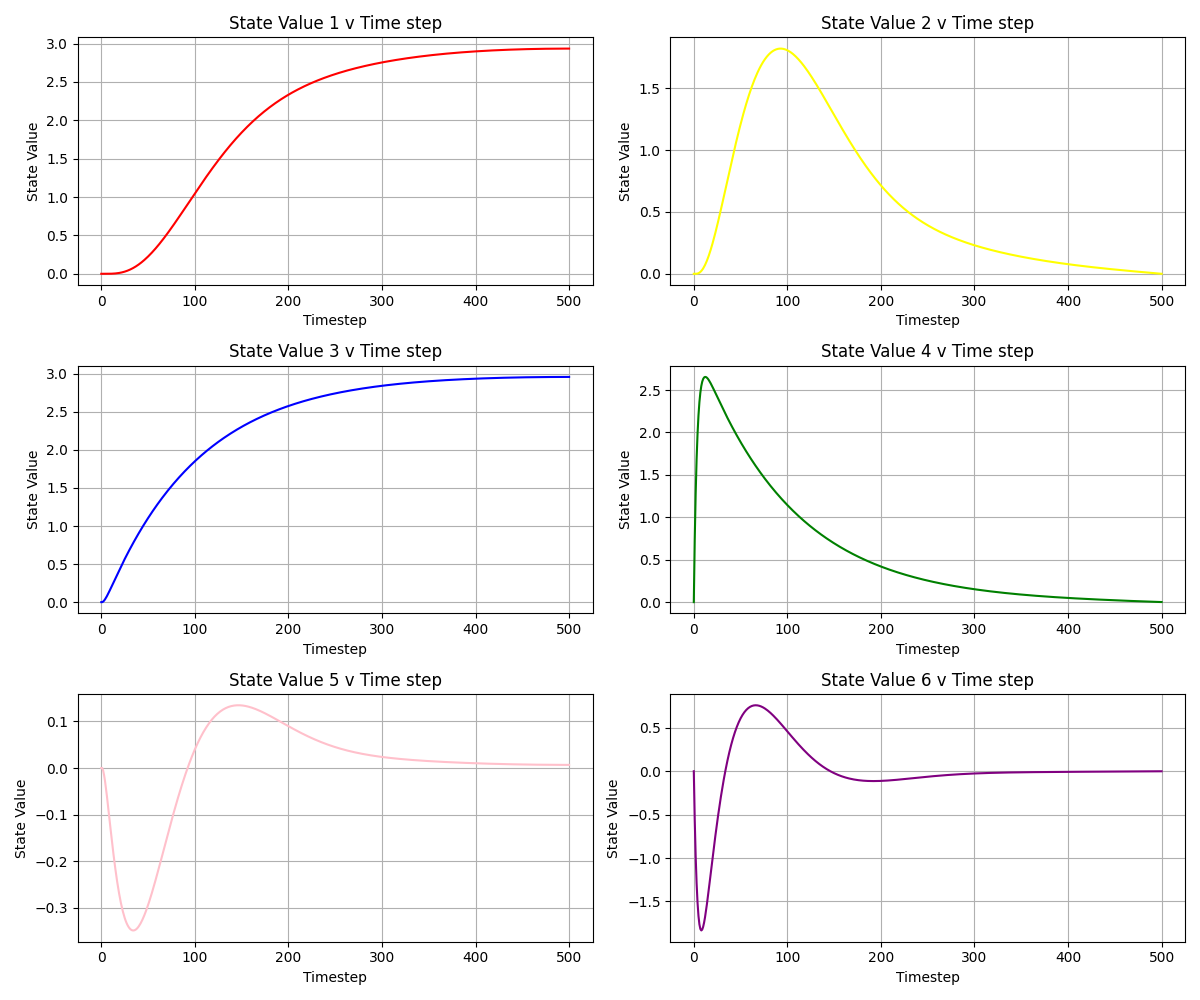

In [7]:
#To plot the graph of state x with each timestep
timesteps = list(range(501))
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
colors = ["red", "yellow", "blue", "green", "pink", "purple"]
axs = axs.flatten()

# Plot each state value in a separate subplot
for i in range(6):
    axs[i].plot(timesteps, states[i], color = colors[i])
    axs[i].set_title(f'State Value {i+1} v Time step')
    axs[i].set_xlabel('Timestep')
    axs[i].set_ylabel('State Value')
    axs[i].grid()

plt.tight_layout()
plt.show()

# **Answer 4**

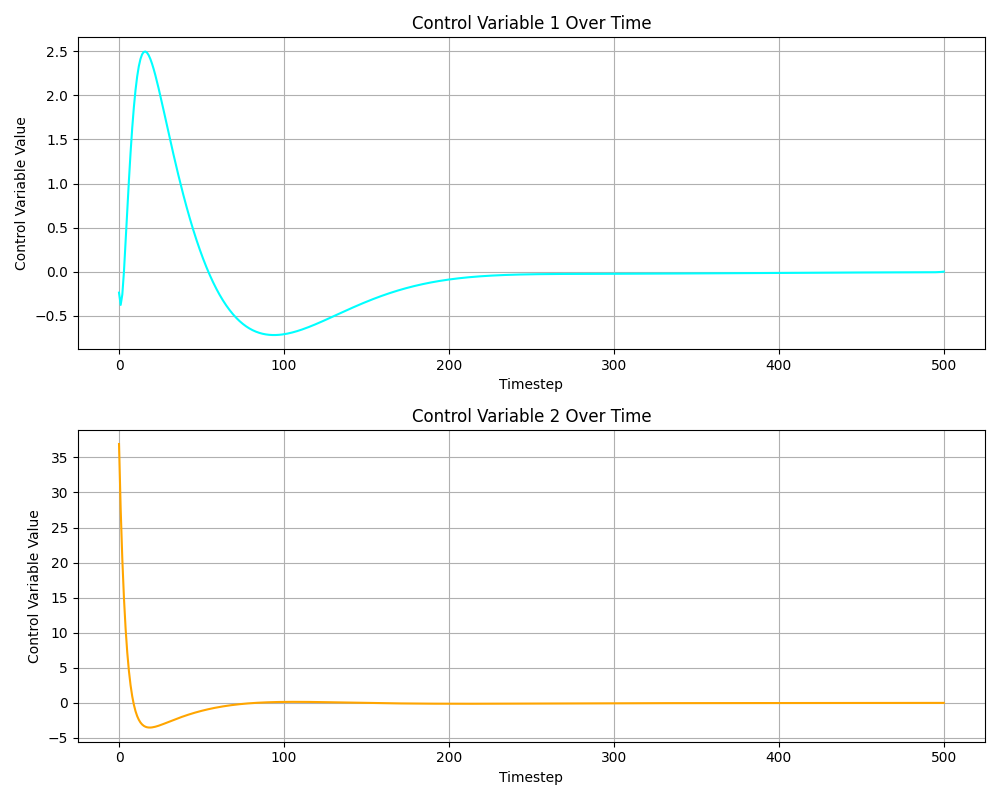

In [8]:
#To plot the graph of control u with each timestep
timesteps = list(range(501))
control1, control2 = controls

fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column

# Plot the first control variable
axs[0].plot(timesteps, control1, linestyle='-', color='cyan')
axs[0].set_title('Control Variable 1 Over Time')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('Control Variable Value')
axs[0].grid()

# Plot the second control variable
axs[1].plot(timesteps, control2, linestyle='-', color='orange')
axs[1].set_title('Control Variable 2 Over Time')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Control Variable Value')
axs[1].grid()


plt.tight_layout()
plt.show()